In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Analysis

In [5]:
# Load the data
wine_df = pd.read_csv('/content/drive/MyDrive/DATASET/OSX_DS_assignment.csv')

### Number of reviews for each variety

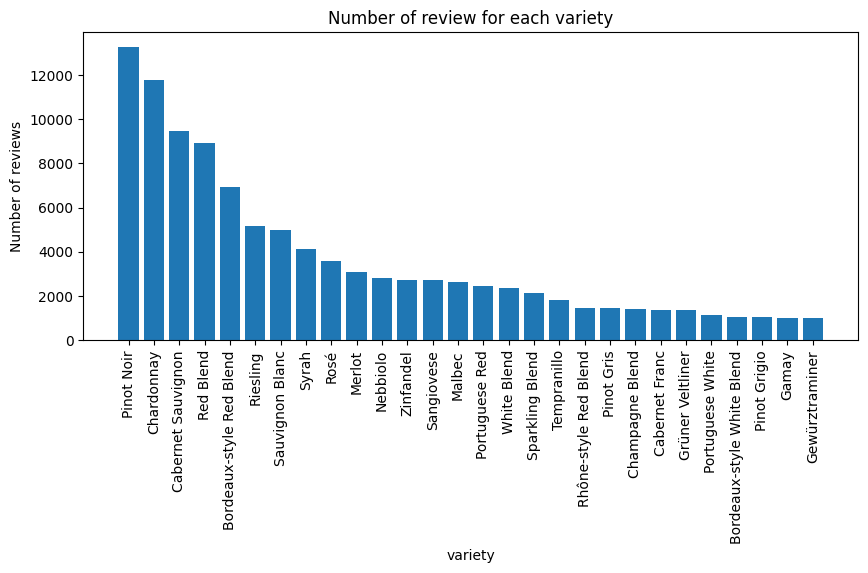

In [6]:
# set parameter for ploting
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':100})

# Count the number of reviews for each variety
variety_count = wine_df.groupby('variety')['points'].count()
# Sort the groups by count
sorted_variety_count = variety_count.sort_values(ascending=False)
# Create a bar plot
plt.bar(sorted_variety_count.index, sorted_variety_count.values)

# Add labels and title to the plot
plt.xlabel('variety')
plt.ylabel('Number of reviews')
plt.title('Number of review for each variety')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [7]:
sorted_variety_count

variety
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer      

### Points for each variety

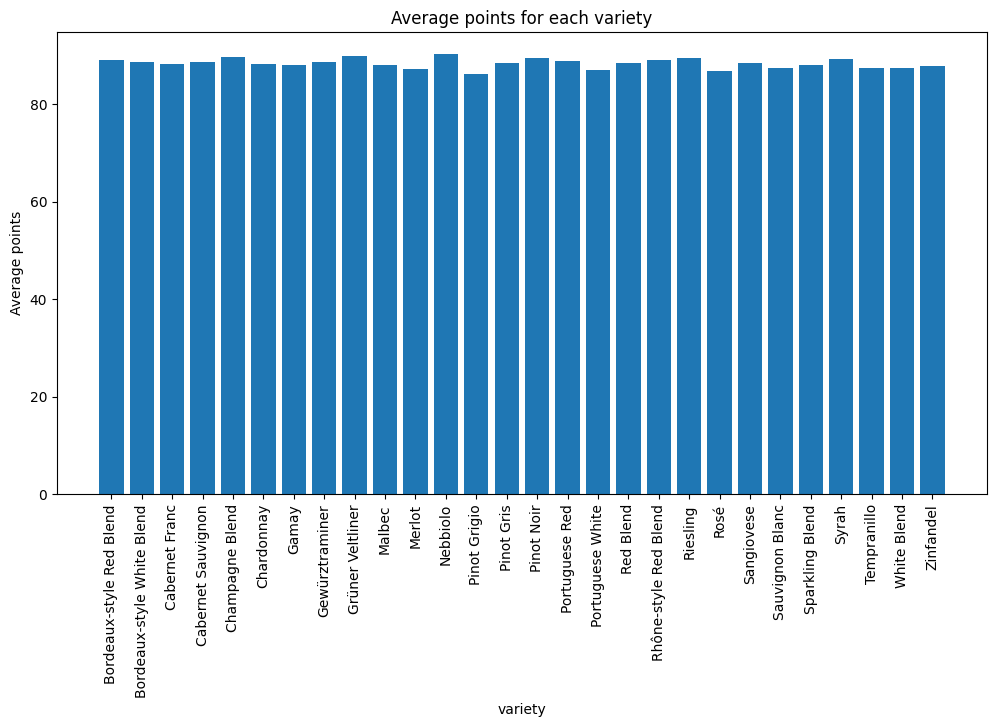

In [8]:
# set parameter for ploting
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

# Count the mean points for each variety
average_points = wine_df.groupby('variety')['points'].mean()

# Sort the groups by mean
sorted_average_points = average_points.sort_values(ascending=False)

# Create a bar plot
plt.bar(average_points.index, average_points.values)

# Add labels and title to the plot
plt.xlabel('variety')
plt.ylabel('Average points')
plt.title('Average points for each variety')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [9]:
average_points

variety
Bordeaux-style Red Blend      89.106435
Bordeaux-style White Blend    88.690432
Cabernet Franc                88.150776
Cabernet Sauvignon            88.607580
Champagne Blend               89.663324
Chardonnay                    88.340083
Gamay                         88.033171
Gewürztraminer                88.590909
Grüner Veltliner              89.980669
Malbec                        87.983032
Merlot                        87.208575
Nebbiolo                      90.251070
Pinot Grigio                  86.237643
Pinot Gris                    88.496220
Pinot Noir                    89.411468
Portuguese Red                88.810624
Portuguese White              86.930975
Red Blend                     88.380282
Rhône-style Red Blend         89.153637
Riesling                      89.450183
Rosé                          86.846240
Sangiovese                    88.550794
Sauvignon Blanc               87.429636
Sparkling Blend               88.045053
Syrah                         89

### Wordcloud for review description

In [10]:
# train data
desc = wine_df['review_description']

# convert to lowercase
desc= desc.str.lower()

# Remove punctuation
desc = desc.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Remove stopwords
stop_words = set(stopwords.words('english'))
desc = desc.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Lemmatization
lemmatizer = WordNetLemmatizer()
desc = desc.apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

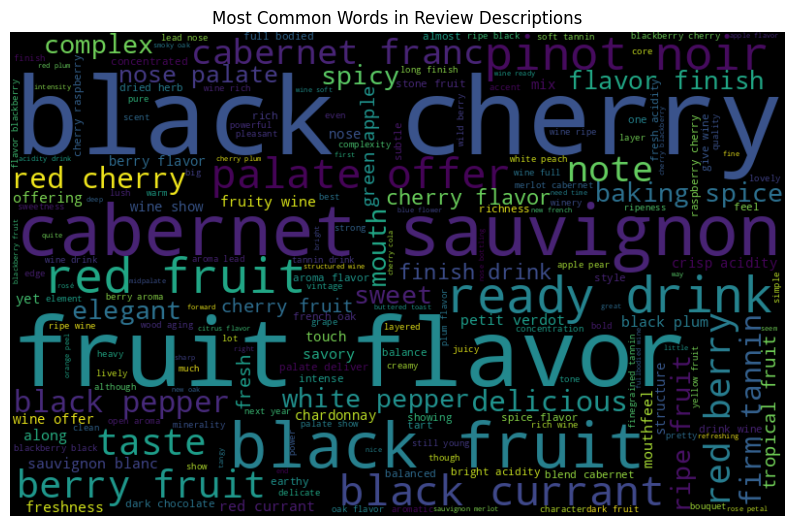

In [11]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in desc])
wordcloud = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Words in Review Descriptions')
plt.show()

### Sentiment analysis of review description

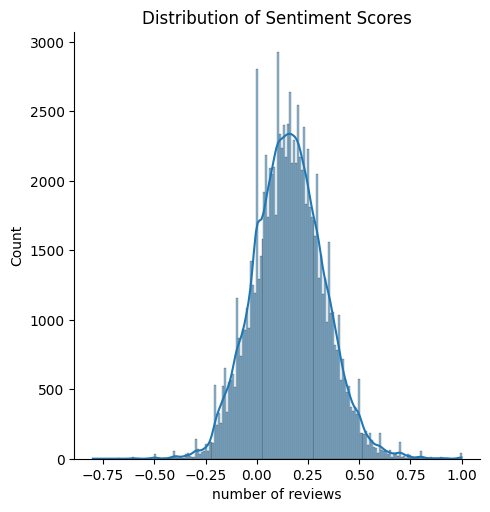

variety
Portuguese White              0.275040
Bordeaux-style White Blend    0.246775
Gewürztraminer                0.239397
Champagne Blend               0.229984
Pinot Gris                    0.213844
Rosé                          0.208306
Grüner Veltliner              0.203769
Chardonnay                    0.200851
Pinot Grigio                  0.194378
Sparkling Blend               0.185588
Riesling                      0.184677
Sauvignon Blanc               0.181425
Gamay                         0.178610
White Blend                   0.177342
Portuguese Red                0.164923
Pinot Noir                    0.161825
Zinfandel                     0.151831
Bordeaux-style Red Blend      0.144361
Syrah                         0.134874
Cabernet Franc                0.133955
Rhône-style Red Blend         0.133554
Merlot                        0.130718
Cabernet Sauvignon            0.123392
Malbec                        0.103623
Red Blend                     0.102676
Tempranillo      

In [12]:
from textblob import TextBlob
import seaborn as sns

# Sentiment analysis on review_description
wine_df['sentiment'] = wine_df['review_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
sns.displot(wine_df['sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('number of reviews')
plt.show()

# Average sentiment score per variety
average_sentiment = wine_df.groupby('variety')['sentiment'].mean().sort_values(ascending=False)
print(average_sentiment)


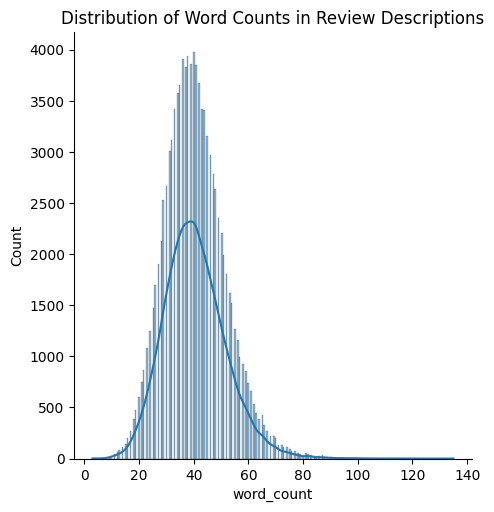

variety
Rhône-style Red Blend         44.857240
Red Blend                     42.827856
Syrah                         42.738049
Tempranillo                   42.669613
Pinot Noir                    42.486438
Champagne Blend               42.414040
Malbec                        42.229261
Nebbiolo                      42.159058
Cabernet Sauvignon            41.921242
Riesling                      41.038736
Cabernet Franc                40.875831
Bordeaux-style Red Blend      40.484165
Gewürztraminer                40.460474
Sangiovese                    40.141116
White Blend                   39.982627
Portuguese Red                39.854826
Sparkling Blend               39.635392
Pinot Gris                    39.282474
Grüner Veltliner              39.147212
Zinfandel                     38.617170
Chardonnay                    38.348507
Merlot                        38.063507
Sauvignon Blanc               37.988122
Gamay                         37.063415
Bordeaux-style White Blend    36

In [13]:
# Word count analysis on review_description
wine_df['word_count'] = wine_df['review_description'].apply(lambda x: len(str(x).split()))

# Visualize word count distribution
sns.displot(wine_df['word_count'], kde=True)
plt.title('Distribution of Word Counts in Review Descriptions')
plt.show()

# Average word count per variety
average_word_count = wine_df.groupby('variety')['word_count'].mean().sort_values(ascending=False)
print(average_word_count)

### Reviews distribution by country

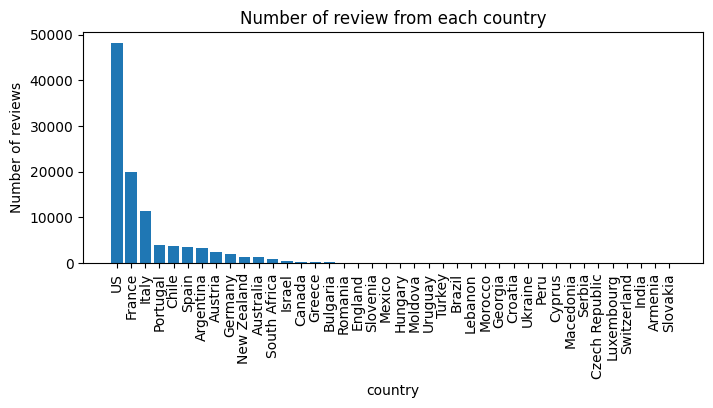

In [14]:
# set parameter for ploting
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':100})

# Count the number of reviews for each variety
review_count = wine_df.groupby('country')['points'].count()

# Sort the groups by count
sorted_review_count = review_count.sort_values(ascending=False)

# Create a bar plot
plt.bar(sorted_review_count.index, sorted_review_count.values)

# Add labels and title to the plot
plt.xlabel('country')
plt.ylabel('Number of reviews')
plt.title('Number of review from each country')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
# Show the plot
plt.show()

In [15]:
sorted_review_count

country
US                48153
France            19932
Italy             11370
Portugal           4038
Chile              3630
Spain              3438
Argentina          3204
Austria            2413
Germany            1944
New Zealand        1398
Australia          1291
South Africa        906
Israel              398
Canada              212
Greece              192
Bulgaria            118
Romania             100
England              74
Slovenia             58
Mexico               54
Hungary              50
Moldova              43
Uruguay              40
Turkey               38
Brazil               37
Lebanon              33
Morocco              23
Georgia              17
Croatia              16
Ukraine              12
Peru                 12
Cyprus                8
Macedonia             6
Serbia                6
Czech Republic        5
Luxembourg            5
Switzerland           5
India                 2
Armenia               1
Slovakia              1
Name: points, dtype: int64

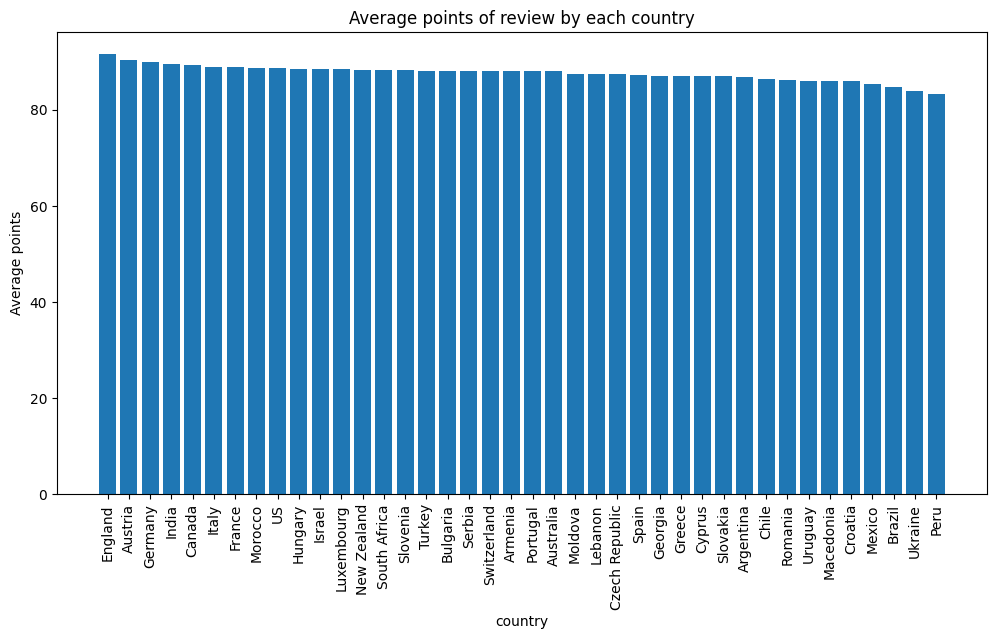

In [16]:
# set parameter for ploting
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

# Count the number of reviews for each variety
review_average = wine_df.groupby('country')['points'].mean()

# Sort the groups by count
sorted_review_average = review_average.sort_values(ascending=False)

# Create a bar plot
plt.bar(sorted_review_average.index, sorted_review_average.values)

# Add labels and title to the plot
plt.xlabel('country')
plt.ylabel('Average points')
plt.title('Average points of review by each country')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)
# Show the plot
plt.show()

### Correlation between price and ratings

In [17]:
corr = wine_df['price'].corr(wine_df['points'])

print(f"The correlation between price and ratings is: {corr:.2f}")

The correlation between price and ratings is: 0.42


## Creating Predictive Model

In [18]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/DATASET/OSX_DS_assignment.csv')

### Preprocessing data

In [19]:
df.isna().sum()

user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points                    0
price                  6963
province                 39
region_1              16068
region_2              58459
winery                    0
variety                   0
dtype: int64

In [20]:
# drop or replace to remove empty values

# region_2 has half of the values as null so drop it
df.drop('region_2', axis=1, inplace=True)
# the username has no relation with variety so drop it
df.drop('user_name', axis=1, inplace=True)
# drop records where conoutries are null
df.dropna(subset=['country'], inplace=True)
df['price'] = df['price'].fillna(df['price'].mean())
df['region_1'] = df['region_1'].fillna('unknown')
df['designation'] = df['designation'].fillna('unknown')


In [21]:
# applying lable encoder on target variable
le = LabelEncoder()
df['variety'] = le.fit_transform(df['variety'])
encodings = pd.DataFrame( {'label' : le.inverse_transform([i for i in range(1, 28)]), 'number':[i for i in range(1, 28)] } )

In [22]:
encodings

,label,number
0,Bordeaux-style White Blend,1
1,Cabernet Franc,2
2,Cabernet Sauvignon,3
3,Champagne Blend,4
4,Chardonnay,5
5,Gamay,6
6,Gewürztraminer,7
7,Grüner Veltliner,8
8,Malbec,9
9,Merlot,10


In [23]:
df.dtypes

country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
winery                 object
variety                 int64
dtype: object

### Getting test and train data

In [24]:
X, Y = df.drop(['variety'], axis=1), df['variety']

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape, X_test.shape)

(82626, 9) (20657, 9)


### Converting text feautres to numeric

In [27]:
# decided number of components to represent each feature
n_components = 3

#### designation

In [28]:
# converting designation to numeric
# training data
onehot_encoder_designation = OneHotEncoder(max_categories=5000, handle_unknown='ignore')
onehot_encoded_designation = onehot_encoder_designation.fit_transform(X_train['designation'].values.reshape(-1, 1))
pca_designation = PCA(n_components=n_components)
pca_result_train = pca_designation.fit_transform(onehot_encoded_designation.toarray())
# testing data
onehot_encoded_designation = onehot_encoder_designation.transform(X_test['designation'].values.reshape(-1, 1))
pca_result_test = pca_designation.transform(onehot_encoded_designation.toarray())


In [29]:
# designation train
pca_df = pd.DataFrame(data=pca_result_train, columns=['designation' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['designation'], inplace=True, axis = 1)
print(pca_df.shape)
# designation test
pca_df = pd.DataFrame(data=pca_result_test, columns=['designation' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['designation'], inplace=True, axis = 1)

(82626, 3)


#### province

In [30]:
# converting province to numeric
# training data
onehot_encoder_province = OneHotEncoder(max_categories=5000, handle_unknown='ignore')
onehot_encoded_province = onehot_encoder_province.fit_transform(X_train['province'].values.reshape(-1, 1))
pca_province = PCA(n_components=n_components)
pca_result_train = pca_province.fit_transform(onehot_encoded_province.toarray())
# testing data
onehot_encoded_province = onehot_encoder_province.transform(X_test['province'].values.reshape(-1, 1))
pca_result_test = pca_province.transform(onehot_encoded_province.toarray())


In [31]:
# province train
pca_df = pd.DataFrame(data=pca_result_train, columns=['province' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['province'], inplace=True, axis = 1)
# province test
pca_df = pd.DataFrame(data=pca_result_test, columns=['province' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['province'], inplace=True, axis = 1)

#### region_1

In [32]:
# converting region 1 to numeric
# training data
onehot_encoder_region_1 = OneHotEncoder(max_categories=5000, handle_unknown='ignore')
onehot_encoded_region_1 = onehot_encoder_region_1.fit_transform(X_train['region_1'].values.reshape(-1, 1))
pca_region_1 = PCA(n_components=n_components)
pca_result_train = pca_region_1.fit_transform(onehot_encoded_region_1.toarray())
# testing data
onehot_encoded_region_1 = onehot_encoder_region_1.transform(X_test['region_1'].values.reshape(-1, 1))
pca_result_test = pca_region_1.transform(onehot_encoded_region_1.toarray())


In [33]:
# region_1 train
pca_df = pd.DataFrame(data=pca_result_train, columns=['region_1_' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['region_1'], inplace=True, axis = 1)
# region_1 test
pca_df = pd.DataFrame(data=pca_result_test, columns=['region_1_' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['region_1'], inplace=True, axis = 1)

#### winery

In [34]:
# converting winery to numeric
# training data
onehot_encoder_winery = OneHotEncoder(max_categories=5000, handle_unknown='ignore')
onehot_encoded_winery = onehot_encoder_winery.fit_transform(X_train['winery'].values.reshape(-1, 1))
pca_winery = PCA(n_components=n_components)
pca_result_train = pca_winery.fit_transform(onehot_encoded_winery.toarray())
# testing data
onehot_encoded_winery = onehot_encoder_winery.transform(X_test['winery'].values.reshape(-1, 1))
pca_result_test = pca_winery.transform(onehot_encoded_winery.toarray())


In [35]:
# winery train
pca_df = pd.DataFrame(data=pca_result_train, columns=['winery' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['winery'], inplace=True, axis = 1)
# winery test
pca_df = pd.DataFrame(data=pca_result_test, columns=['winery' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['winery'], inplace=True, axis = 1)

#### country

In [36]:
# converting country to numeric
# training data
onehot_encoder_country = OneHotEncoder(max_categories=5000, handle_unknown='ignore')
onehot_encoded_country = onehot_encoder_country.fit_transform(X_train['country'].values.reshape(-1, 1))
pca_country = PCA(n_components=n_components)
pca_result_train = pca_country.fit_transform(onehot_encoded_country.toarray())
# testing data
onehot_encoded_country = onehot_encoder_country.transform(X_test['country'].values.reshape(-1, 1))
pca_result_test = pca_country.transform(onehot_encoded_country.toarray())


In [37]:
# country train
pca_df = pd.DataFrame(data=pca_result_train, columns=['country' + str(i) for i in range(1, n_components+1)])
X_train = pd.concat([X_train.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_train.drop(['country'], inplace=True, axis = 1)
# country test
pca_df = pd.DataFrame(data=pca_result_test, columns=['country' + str(i) for i in range(1, n_components+1)])
X_test = pd.concat([X_test.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
X_test.drop(['country'], inplace=True, axis = 1)

#### review_title and	review_description

In [38]:
# train data
X_train['review_title_review_description'] = X_train['review_title'] + " " + X_train['review_description']
X_train.drop(['review_title'], inplace=True, axis = 1)
X_train.drop(['review_description'], inplace=True, axis = 1)

# convert to lowercase
X_train['review_title_review_description'] = X_train['review_title_review_description'].str.lower()

# Remove punctuation
X_train['review_title_review_description'] = X_train['review_title_review_description'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Remove stopwords
stop_words = set(stopwords.words('english'))
X_train['review_title_review_description'] = X_train['review_title_review_description'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Lemmatization
lemmatizer = WordNetLemmatizer()
X_train['review_title_review_description'] = X_train['review_title_review_description'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))


In [39]:
# train data
X_test['review_title_review_description'] = X_test['review_title'] + " " + X_test['review_description']
X_test.drop(['review_title'], inplace=True, axis = 1)
X_test.drop(['review_description'], inplace=True, axis = 1)

# convert to lowercase
X_test['review_title_review_description'] = X_test['review_title_review_description'].str.lower()

# Remove punctuation
X_test['review_title_review_description'] = X_test['review_title_review_description'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

# Remove stopwords
stop_words = set(stopwords.words('english'))
X_test['review_title_review_description'] = X_test['review_title_review_description'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Lemmatization
lemmatizer = WordNetLemmatizer()
X_test['review_title_review_description'] = X_test['review_title_review_description'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))


In [40]:
# create TFIDF Vectors
tf_idf_title_desc_vectorizer= TfidfVectorizer(max_features=500)
# applying tf idf to training data
X_train_tf_idf = tf_idf_title_desc_vectorizer.fit_transform(X_train['review_title_review_description'])
tf_idf_train_df = pd.DataFrame(data=X_train_tf_idf.toarray())
X_train = pd.concat([X_train, tf_idf_train_df], axis=1)

# applying tf idf to test data
X_test_tf_idf = tf_idf_title_desc_vectorizer.transform(X_test['review_title_review_description'])
tf_idf_test_df = pd.DataFrame(data=X_test_tf_idf.toarray())
X_test = pd.concat([X_test, tf_idf_test_df], axis=1)

X_train.drop(['review_title_review_description'], inplace=True, axis = 1)
X_test.drop(['review_title_review_description'], inplace=True, axis = 1)


### scale price and points

In [41]:
# scale price and points field in range [0,1]
price_scaler = MinMaxScaler()
X_train['price'] = price_scaler.fit_transform(X_train['price'].to_numpy().reshape(-1, 1))
X_test['price'] = price_scaler.transform(X_test['price'].to_numpy().reshape(-1, 1))

points_scaler = MinMaxScaler()
X_train['points'] = points_scaler.fit_transform(X_train['price'].to_numpy().reshape(-1, 1))
X_test['points'] = points_scaler.transform(X_test['price'].to_numpy().reshape(-1, 1))


In [42]:
# convert columns name to string
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

### Creating Machine Learning Model

#### Logistic Regression

In [43]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [44]:
logreg_pred = logreg.predict(X_test)
ac = accuracy_score(y_test, logreg_pred)
print("Accuracy of Logistic Regression model is: ",ac)

Accuracy of Logistic Regression model is:  0.9376482548288716


#### Decision Tree

In [45]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [46]:
dt_pred = dtc.predict(X_test)
ac = accuracy_score(y_test, dt_pred)
print("Accuracy of Desision Tree model is: ",ac)

Accuracy of Desision Tree model is:  0.9425860483129206


#### Random Forest

In [47]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:
rfc_pred = rfc.predict(X_test)
ac = accuracy_score(y_test, rfc_pred)
print("Accuracy of Random Forest model is: ",ac)

Accuracy of Random Forest model is:  0.9569153313646706


So Random Forest model performs better with 95% accuracy

### Creating API

In [49]:
# define function to predict wine variety based on given features
def predict(designation, province, region_1, winery, country, review_title, review_description, points, price):
  all_features = np.array([])
  # encode each of given attributes
  designation_features = pca_designation.transform(onehot_encoder_designation.transform(np.array(designation).reshape(-1,1)).toarray())
  province_features = pca_province.transform(onehot_encoder_province.transform(np.array(province).reshape(-1,1)).toarray())
  region_1_features = pca_region_1.transform(onehot_encoder_region_1.transform(np.array(region_1).reshape(-1,1)).toarray())
  winery_features = pca_winery.transform(onehot_encoder_winery.transform(np.array(winery).reshape(-1,1)).toarray())
  country_features = pca_country.transform(onehot_encoder_country.transform(np.array(country).reshape(-1,1)).toarray())

  # getting features from review title and description
  title_desc = review_title + review_description
  # convert to lowercase
  title_desc = title_desc.lower()
  # Remove punctuation
  title_desc = re.sub(r'[^\w\s]', '', title_desc)
  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  title_desc = ' '.join(word for word in title_desc.split() if word not in stop_words)
  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  title_desc = ' '.join(lemmatizer.lemmatize(word) for word in title_desc.split())
  
  title_desc_tf_idfs = tf_idf_title_desc_vectorizer.transform([title_desc]).toarray()

  # scale points and price
  points = points_scaler.transform(np.array(price).reshape(-1,1))
  price = price_scaler.transform(np.array(price).reshape(-1,1))

  # combine all features
  all_features = np.append(all_features, points)
  all_features = np.append(all_features, price)
  all_features = np.append(all_features, designation_features)
  all_features = np.append(all_features, province_features)
  all_features = np.append(all_features, region_1_features)
  all_features = np.append(all_features, winery_features)
  all_features = np.append(all_features, country_features)
  all_features = np.append(all_features, title_desc_tf_idfs)

  # return predicted feature name by predicting using random forest classifier
  return le.inverse_transform(rfc.predict(all_features.reshape(1,-1)))[0]
  


#### Making a prediction

In [50]:
predict('Reserve Late Harvest', 'Michigan', 'Lake Michigan Shore', 'St. Julian', 'US', 'St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)', 'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.', 87,13)

'Riesling'

#### Assumptions

*   variety and user_name has no relation so username is not considered for making prediction
*   Half of the values of region_2 are empty so it is not considered for making prediction 
*   Records are droped where country is empty
*   Empty price values are filled with mean price value
*   Empty region_1 and designation are filled with 'unkown'


